In [1]:
import fenics as fn
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

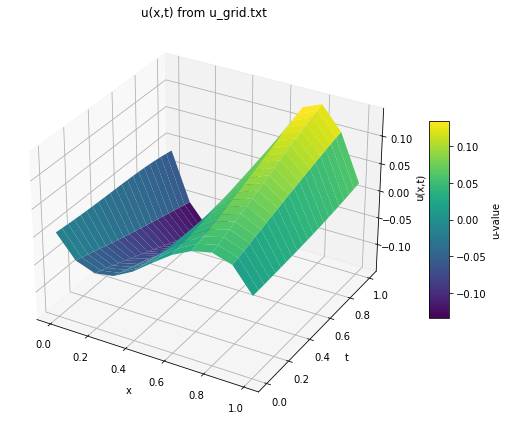

In [2]:
# 1) Load the data
U = np.loadtxt('u_grid.txt', delimiter=' ')  # shape (Nx, Nt)

# 2) Recreate the x and t vectors you used when saving
h  = 0.1
dt = 0.05
x_vals = np.arange(0, 1 + h,  h)   # length Nx
t_vals = np.arange(0, 1 + dt, dt)  # length Nt

# 3) Make a meshgrid (so X[i,j], T[i,j] align with U[i,j])
X, T = np.meshgrid(x_vals, t_vals, indexing='ij')

# --- Option A: 3D surface plot ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('u(x,t) from u_grid.txt')
fig.colorbar(surf, shrink=0.5, aspect=10, label='u-value')
plt.tight_layout()
plt.show()

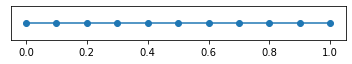

In [3]:
mesh = fn.IntervalMesh(10, 0.0, 1.0)
fn.plot(mesh)

In [4]:
V = fn.FunctionSpace(mesh, "CG", 1)

In [22]:
j = 10 # time slice (t = j*dt)
data = U[:, j] 

In [23]:
# Create a Function and directly assign its nodal values
u = fn.Function(V)
# NOTE: the dofs of a P1 space on an IntervalMesh are ordered exactly
#       by decreasing vertex‐coordinate, so we can do:
u.vector().set_local(np.flip(data))
u.vector().apply("insert")

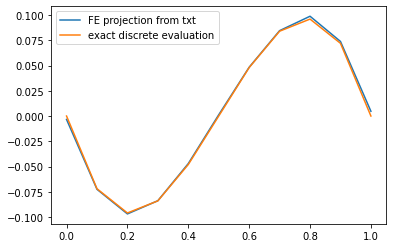

In [25]:
fn.plot(u,label='FE projection from txt')
u_exact = x_vals*(x_vals - 0.5)*(1 - x_vals)*(1 + 2*dt*j)
plt.plot(x_vals, u_exact,label='exact discrete evaluation')
plt.legend()